In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('IMDb movies.csv')

In [3]:
cols = ['title', 'year', 'duration']
title_year_duration = data[cols].copy(deep=True)
title_year_duration
title_year_duration = title_year_duration.sort_values(by='year', ascending=True, na_position='first')
title_year_duration = title_year_duration[2:]   # remove first row coz there is only one entry in 1894
title_year_duration = title_year_duration.reset_index(drop=True)  #reindex the dataframe
title_year_duration.head(10)

,title,year,duration
0,Pinocchio,1911,50
1,Oborona Sevastopolya,1911,100
2,L'Inferno,1911,68
3,Den sorte drøm,1911,53
4,Karadjordje,1911,80
5,Le mystère des roches de Kador,1912,45
6,Richard III,1912,55
7,Independenta Romaniei,1912,120
8,"From the Manger to the Cross; or, Jesus of Naz...",1912,60
9,Cleopatra,1912,100


In [4]:
ave_duration_decade = title_year_duration.groupby((title_year_duration.year//10)*10).mean()
ave_duration_decade['year'] = ave_duration_decade['year'].apply(lambda x: int((x//10)*10))
ave_duration_decade = ave_duration_decade.rename(columns={"year": "decade", "duration":"ave_duration"}).reset_index(drop=True)
ave_duration_decade

,decade,ave_duration
0,1910,80.215686
1,1920,89.092125
2,1930,82.545018
3,1940,89.575513
4,1950,93.134876
5,1960,99.687878
6,1970,100.262356
7,1980,101.433448
8,1990,103.278222
9,2000,102.449722


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
x= ave_duration_decade.decade
y = ave_duration_decade.ave_duration
plt.ylabel("average duration / min")
plt.xlabel("decade")
plt.title("Graph on average duration of movies over decade")
plt.scatter(x,y)
plt.xticks(x)
#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='red')
plt.plot(x,y,'-o')
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:

# data = pd.read_csv('IMDb_movies_w_genre.csv')
columns = ['year', 'duration']
title_year_count = data[columns].copy(deep=True)
title_year_count = title_year_count.sort_values(by='year', ascending=True, na_position='first')
title_year_count = title_year_count[2:]   # remove first 2 row coz there is only one entry in 1890s and 1900s
title_year_count = title_year_count.reset_index(drop=True)  #reindex the dataframe
title_year_count
total_count = title_year_count.groupby((title_year_duration.year//10)*10).count()
total_count['year'] = title_year_count['year'].apply(lambda x: int((x//10)*10))

total_count = total_count.rename(columns={"year": "decade", "duration":"total_count"})
total_count['decade'] = total_count.index.values
total_count= total_count.reset_index(drop=True)
total_count



# sum_genre_decade = title_year_genre.groupby((title_year_genre.year//10)*10).mean()
# #sum_genre_decade['year'] = sum_genre_decade['year'].apply(lambda x: int((x//10)*10))
# sum_genre_decade = sum_genre_decade.rename(columns={"year": "decade"})
# sum_genre_decade['decade'] = sum_genre_decade.index.values
# sum_genre_decade = sum_genre_decade.reset_index(drop=True)
# sum_genre_decade

,decade,total_count
0,1910,204
1,1920,673
2,1930,2710
3,1940,2973
4,1950,4063
5,1960,4966
6,1970,6232
7,1980,7265
8,1990,9629
9,2000,17811


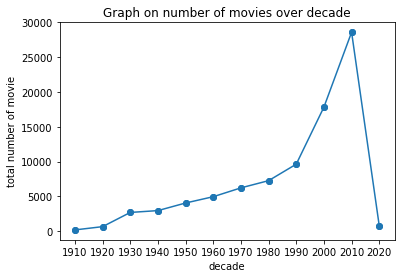

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
x= total_count.decade
y = total_count.total_count
plt.ylabel("total number of movie")
plt.xlabel("decade")
plt.title("Graph on number of movies over decade")
plt.scatter(x,y)
plt.xticks(x)
#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='red')
plt.plot(x,y,'-o')
plt.show()

In [8]:
cols = ['title', 'year', 'genre']
title_year_genre = data[cols].copy(deep=True)
title_year_genre

,title,year,genre
0,Road to Red,2020,"Action, Adventure, Horror"
1,Fantasy Island,2020,"Action, Adventure, Fantasy"
2,The Rental,2020,"Horror, Thriller"
3,Seeru,2020,"Action, Drama"
4,Love Aaj Kal,2020,"Drama, Romance"
5,Zero Distance,2020,Thriller
6,Il giorno sbagliato,2020,"Action, Thriller"
7,Guilty,2020,"Drama, Thriller"
8,Made in Abyss: Fukaki Tamashî no Reimei,2020,"Animation, Adventure, Fantasy"
9,Breaking Surface,2020,"Action, Drama, Thriller"


In [9]:
cols = ['title', 'year', 'genre']
title_year_genre = data[cols].copy(deep=True)
title_year_genre = title_year_genre.sort_values(by='year', ascending=True, na_position='first')
title_year_genre = title_year_genre[1:]   # remove first row coz there is only one entry in 1894
title_year_genre = title_year_genre.reset_index(drop=True)  #reindex the dataframe
title_year_genre

,title,year,genre
0,The Story of the Kelly Gang,1906,"Biography, Crime, Drama"
1,Pinocchio,1911,Fantasy
2,Oborona Sevastopolya,1911,"History, War"
3,L'Inferno,1911,"Adventure, Drama, Fantasy"
4,Den sorte drøm,1911,Drama
5,Karadjordje,1911,"Drama, War"
6,Le mystère des roches de Kador,1912,"Crime, Drama, Mystery"
7,Richard III,1912,Drama
8,Independenta Romaniei,1912,"History, War"
9,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama"


In [10]:
genre_dic = {}

for index, row in title_year_genre.iterrows():
    genre = row['genre'].strip()
    genre_list = genre.split(',')
    for i in range(len(genre_list)):
        genre_list[i]  = genre_list[i].strip()  #remove the space at both side
        
    for genre in genre_list:
        if genre not in genre_dic:
            genre_dic[genre] = 1
        else:
            genre_dic[genre] +=1
genre_dic

{'Biography': 2377,
 'Crime': 11067,
 'Drama': 47110,
 'Fantasy': 3812,
 'History': 2296,
 'War': 2242,
 'Adventure': 7590,
 'Mystery': 5225,
 'Comedy': 29368,
 'Sci-Fi': 3608,
 'Horror': 9557,
 'Western': 1583,
 'Family': 3962,
 'Action': 12948,
 'Romance': 14127,
 'Sport': 1064,
 'Thriller': 11388,
 'Animation': 2141,
 'Music': 1689,
 'Musical': 2041,
 'Film-Noir': 663,
 'Reality-TV': 3,
 'Adult': 2,
 'Documentary': 2,
 'News': 1}

In [11]:

new_lst = sorted(genre_dic, key=genre_dic.get, reverse=True)
print(new_lst)
top_genre_dic = {}
for i in new_lst:
    top_genre_dic[i] = genre_dic[i]
top_genre_dic

['Drama', 'Comedy', 'Romance', 'Action', 'Thriller', 'Crime', 'Horror', 'Adventure', 'Mystery', 'Family', 'Fantasy', 'Sci-Fi', 'Biography', 'History', 'War', 'Animation', 'Musical', 'Music', 'Western', 'Sport', 'Film-Noir', 'Reality-TV', 'Adult', 'Documentary', 'News']


{'Drama': 47110,
 'Comedy': 29368,
 'Romance': 14127,
 'Action': 12948,
 'Thriller': 11388,
 'Crime': 11067,
 'Horror': 9557,
 'Adventure': 7590,
 'Mystery': 5225,
 'Family': 3962,
 'Fantasy': 3812,
 'Sci-Fi': 3608,
 'Biography': 2377,
 'History': 2296,
 'War': 2242,
 'Animation': 2141,
 'Musical': 2041,
 'Music': 1689,
 'Western': 1583,
 'Sport': 1064,
 'Film-Noir': 663,
 'Reality-TV': 3,
 'Adult': 2,
 'Documentary': 2,
 'News': 1}

In [12]:
top_genre_dic
data2 = pd.read_csv('IMDb movies.csv')
temp = np.zeros(len(data2))
for top_genre in top_genre_dic:
    data2[top_genre] = temp
    
for index, row in data2.iterrows():
    genre = row['genre']
    genre_list = genre.split(',')
    print(index)
    for i in range(len(genre_list)):
        genre  = genre_list[i].strip()  #remove the space at both side
        if genre in top_genre_dic:
            data2[genre][index] = 1
        else:
            data2[genre][index] = 0
            
uncomment this to save the data
data.to_csv('IMDb_movies_w_genre.csv', index=False)


In [13]:
data = pd.read_csv('IMDb_movies_w_genre.csv')
columns = ['title', 'year', 'genre', 'Drama', 'Comedy', 'Romance', 'Action',
       'Thriller', 'Crime', 'Horror', 'Adventure', 'Mystery', 'Family',
       'Fantasy', 'Sci-Fi', 'Biography', 'History', 'War', 'Animation',
       'Musical', 'Music', 'Western', 'Sport', 'Film-Noir', 'Reality-TV',
       'Documentary', 'Adult', 'News']

In [14]:
# showing the top 5 result
title_year_genre = data[columns].copy(deep=True)
title_year_genre = title_year_genre.sort_values(by='year', ascending=True, na_position='first')
title_year_genre = title_year_genre[2:]   # remove first 2 row coz there is only one entry in 1890s and 1900s
title_year_genre = title_year_genre.reset_index(drop=True)  #reindex the dataframe
title_year_genre.head(5)

,title,year,genre,Drama,Comedy,Romance,Action,Thriller,Crime,Horror,...,Animation,Musical,Music,Western,Sport,Film-Noir,Reality-TV,Documentary,Adult,News
0,Pinocchio,1911,Fantasy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Oborona Sevastopolya,1911,"History, War",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,L'Inferno,1911,"Adventure, Drama, Fantasy",1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Den sorte drøm,1911,Drama,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Karadjordje,1911,"Drama, War",1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
sum_genre_decade = title_year_genre.groupby((title_year_genre.year//10)*10).mean()
#sum_genre_decade['year'] = sum_genre_decade['year'].apply(lambda x: int((x//10)*10))
sum_genre_decade = sum_genre_decade.rename(columns={"year": "decade"})
sum_genre_decade['decade'] = sum_genre_decade.index.values
sum_genre_decade = sum_genre_decade.reset_index(drop=True)
sum_genre_decade.head(5)

,decade,Drama,Comedy,Romance,Action,Thriller,Crime,Horror,Adventure,Mystery,...,Animation,Musical,Music,Western,Sport,Film-Noir,Reality-TV,Documentary,Adult,News
0,1910,0.656863,0.215686,0.171569,0.068627,0.004902,0.127451,0.053922,0.137255,0.058824,...,0.000000,0.000000,0.000000,0.073529,0.009804,0.000000,0.0,0.0,0.0,0.0
1,1920,0.692422,0.285290,0.361070,0.053492,0.041605,0.065379,0.044577,0.108470,0.044577,...,0.001486,0.035661,0.011887,0.032689,0.017831,0.005944,0.0,0.0,0.0,0.0
2,1930,0.563838,0.386716,0.369742,0.099262,0.030258,0.173801,0.032103,0.123616,0.099262,...,0.002583,0.101107,0.049077,0.029889,0.013653,0.012177,0.0,0.0,0.0,0.0
3,1940,0.541204,0.350151,0.250252,0.109317,0.053818,0.192398,0.040700,0.132190,0.104272,...,0.008073,0.088126,0.051127,0.059199,0.007400,0.100908,0.0,0.0,0.0,0.0
4,1950,0.552055,0.270736,0.194191,0.090081,0.057839,0.180162,0.051686,0.143244,0.042579,...,0.006153,0.063746,0.021905,0.097957,0.012552,0.080236,0.0,0.0,0.0,0.0


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
genre_list = ['Drama', 'Comedy', 'Romance', 'Action',
       'Thriller', 'Crime', 'Horror', 'Adventure', 'Mystery', 'Family',
       'Fantasy', 'Sci-Fi', 'Biography', 'History', 'War', 'Animation',
       'Musical', 'Music', 'Western', 'Sport', 'Film-Noir', 'Reality-TV',
       'Documentary', 'Adult', 'News']

In [23]:
# for genre in genre_list:
#     x= sum_genre_decade['decade']
#     y = sum_genre_decade[genre]
#     plt.ylabel(f"relative frequency of genre {genre}")
#     plt.xlabel("decade")
#     plt.title(f"Graph relative frequency of movie genre {genre} appeared over the decades")
#     plt.scatter(x,y)
#     plt.xticks(x)
#     #plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='red')
#     plt.plot(x,y,'-o')
#     plt.show()

Text(0.5, 1.0, 'Graph of relative frequencies of genre over the decades')

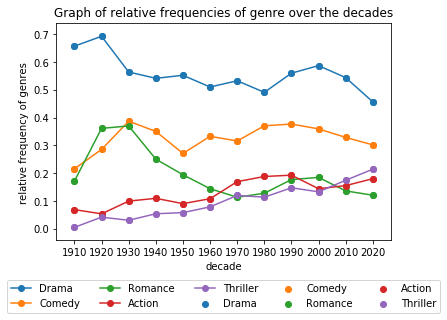

In [19]:
fig, ax = plt.subplots() # lets us acces the axis and plot seperately. 

plt.ylabel(f"relative frequency of genres ")
plt.xlabel("decade")

for genre in genre_list[0:5]:
    x= sum_genre_decade['decade']
    y = sum_genre_decade[genre]
    #ax.title(f"Graph total number of movie genre {genre} appeared over the decades")
    ax.scatter(x,y)
    plt.xticks(x)
    #ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    ax.plot(x,y,'-o')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.16), ncol=5)
plt.title(f"Graph of relative frequencies of genre over the decades")
#plt.show()

Text(0.5, 1.0, 'Graph of relative frequencies of genre over the decades')

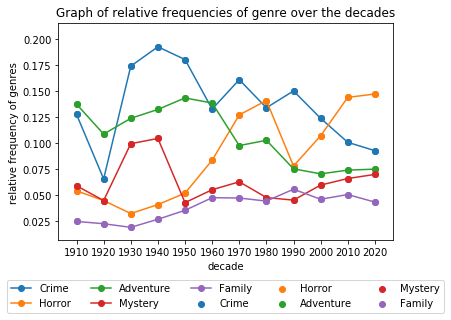

In [20]:
fig, ax = plt.subplots() # lets us acces the axis and plot seperately. 

plt.ylabel(f"relative frequency of genres ")
plt.xlabel("decade")

for genre in genre_list[5:10]:
    x= sum_genre_decade['decade']
    y = sum_genre_decade[genre]
    #ax.title(f"Graph total number of movie genre {genre} appeared over the decades")
    ax.scatter(x,y)
    plt.xticks(x)
    #ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    ax.plot(x,y,'-o')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.16), ncol=5)
plt.title(f"Graph of relative frequencies of genre over the decades")
#plt.show()

Text(0.5, 1.0, 'Graph of relative frequencies of genre over the decades')

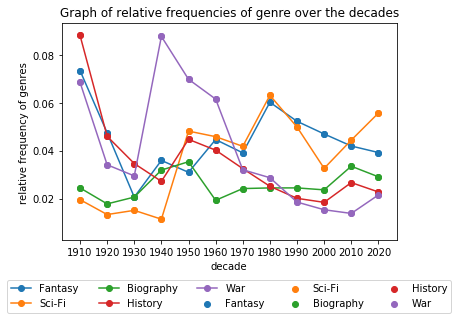

In [21]:
fig, ax = plt.subplots() # lets us acces the axis and plot seperately. 

plt.ylabel(f"relative frequency of genres ")
plt.xlabel("decade")

for genre in genre_list[10:15]:
    x= sum_genre_decade['decade']
    y = sum_genre_decade[genre]
    #ax.title(f"Graph total number of movie genre {genre} appeared over the decades")
    ax.scatter(x,y)
    plt.xticks(x)
    #ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    ax.plot(x,y,'-o')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.16), ncol=5)
plt.title(f"Graph of relative frequencies of genre over the decades")

Text(0.5, 1.0, 'Graph of relative frequencies of genre over the decades')

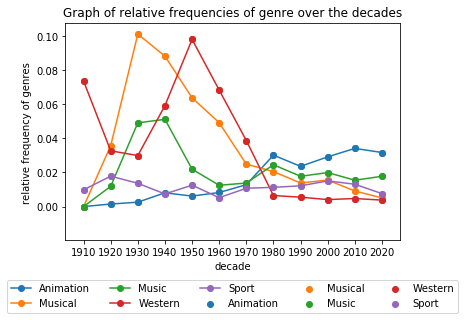

In [22]:
fig, ax = plt.subplots() # lets us acces the axis and plot seperately. 

plt.ylabel(f"relative frequency of genres ")
plt.xlabel("decade")

for genre in genre_list[15:20]:
    x= sum_genre_decade['decade']
    y = sum_genre_decade[genre]
    #ax.title(f"Graph total number of movie genre {genre} appeared over the decades")
    ax.scatter(x,y)
    plt.xticks(x)
    #ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    ax.plot(x,y,'-o')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.16), ncol=5)
plt.title(f"Graph of relative frequencies of genre over the decades")